In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from random import sample
import warnings
warnings.simplefilter('ignore')
colours = ['salmon', 'sandybrown','khaki','mediumseagreen','cadetblue','cornflowerblue','darkslateblue','mediumpurple','plum']

## Preparing CDR3β Chains 

In this notebook CDR3$\beta$ chains are prepared. Epitope-specific and background chains are sourced from the VDJdb database [1], and Tanno *et al*. [2] respectively.



In [2]:
# load background and specific CDR3B sequences
#BG = pd.read_csv(r"C:\Users\jocel\OneDrive\Documents\Jocelyn University\Year 3\Summer Internships\Raw datasets\data\A1 naive.txt",sep='\t',on_bad_lines='skip',header =0)
#complete_beta = pd.read_csv(r"C:\Users\jocel\OneDrive\Documents\Jocelyn University\Year 3\Summer Internships\Raw datasets\all_beta_complete.tsv",sep='\t',on_bad_lines='skip',header =0)
BG = pd.read_csv(r"Raw datasets\data\A1 naive.txt",sep='\t',on_bad_lines='skip',header =0)
complete_beta = pd.read_csv(r"Raw datasets\all_beta_complete.tsv",sep='\t',on_bad_lines='skip',header =0)

In [3]:
complete_beta = complete_beta.drop(complete_beta[complete_beta['Gene'] == 'TRA'].index)

In [4]:
complete_beta

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
0,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53903,30590,TRB,CASSVRSTDTQYF,TRBV7-2*01,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSVRSTDTQYF"", ""cdr3_old"": ""CASSVRS...",0
53904,30591,TRB,CASSLRYTDTQYF,TRBV7-2*01,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLRYTDTQYF"", ""cdr3_old"": ""CASSLRY...",0
53905,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0
53906,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2


In [5]:
# epitopes with the most sequences
no_of_epitopes = 8
epitope_counts = complete_beta['Epitope'].value_counts()
print(epitope_counts.head(8))
epitopes = (epitope_counts.iloc[:no_of_epitopes]).index.tolist()

KLGGALQAK     13921
GILGFVFTL      5185
NLVPMVATV      5165
ELAGIGILTV     2269
AVFDRKSDAK     1775
RAKFKQLL       1509
GLCTLVAML      1425
YLQPRTFLL      1108
Name: Epitope, dtype: int64


In [6]:
BG_B_seqs_full = BG[['CDRH3_AA']].rename(columns={"CDRH3_AA": "CDR3"})
BG_B_seqs_full['Chain Length'] = BG_B_seqs_full['CDR3'].apply(len)
BG_B_seqs_full['Epitope'] = 'Background'
BG_B_seqs_full = BG_B_seqs_full.drop_duplicates(subset=['CDR3'])

full_seqs = pd.DataFrame()
full_seqs = full_seqs.append(BG_B_seqs_full)

print(epitopes)

for epitope in epitopes:
    ept = complete_beta.loc[(complete_beta['Epitope'] == epitope)]
    ept = ept.drop_duplicates(subset=['CDR3'])
   
    summ_ept = ept[['CDR3', 'Epitope']]
    summ_ept['Chain Length'] = summ_ept['CDR3'].apply(len) # add chain length
 
    full_seqs = full_seqs.append(summ_ept) 
    
full_seqs.reset_index(drop=True)
epitope_counts = full_seqs['Epitope'].value_counts()

epitope_names = (epitope_counts.iloc[:]).index.tolist()


['KLGGALQAK', 'GILGFVFTL', 'NLVPMVATV', 'ELAGIGILTV', 'AVFDRKSDAK', 'RAKFKQLL', 'GLCTLVAML', 'YLQPRTFLL']


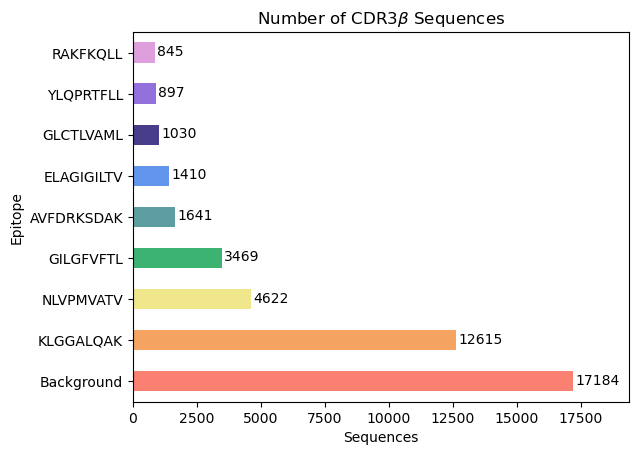

In [7]:
def plot_seq_size(all_sequences,epitope_names):
    '''
    Plots a bar graph of number of
    specific sequences 
    
    '''
    
    plt.figure()
    plt.title(r"Number of CDR3$\beta$ Sequences")
    plt.ylabel("Epitope")
    plt.xlabel("Sequences")

    x = all_sequences['Epitope'].value_counts().sort_values(ascending=False)
    ax = x.plot.barh(color=colours)
    ax.set(xlim = [0,x.max()+2200])

    for index, value in enumerate(x):
        plt.text(value+100, index-0.08,
             str(value))
        
    plt.savefig("Figures\CDR3B epi-sequences.jpg")
    
    plt.show()
    
    return  
plot_seq_size(full_seqs,epitope_names)

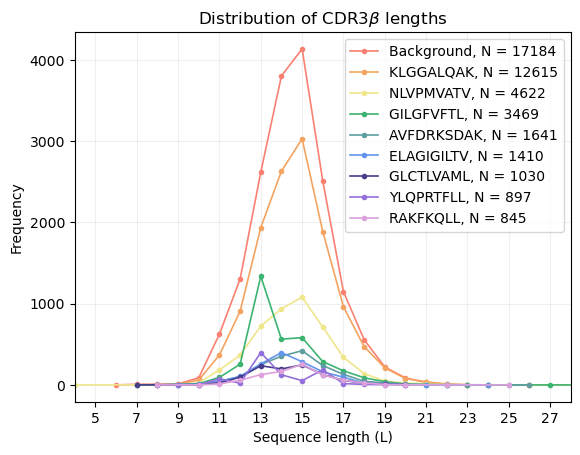

In [8]:
def plot_seq_len_dist(all_sequences,epitope_names):
    '''
    Plots sequence length distrubutions
    '''
    plt.figure()
    plt.grid(alpha=0.2)
    plt.title(r"Distribution of CDR3$\beta$ lengths")
    plt.xlabel("Sequence length (L)")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(5,29,2))
    plt.xlim(4,28)
    
    for i, epitope in enumerate(epitope_names):
        eps =  all_sequences.loc[(all_sequences['Epitope'] == epitope)]
        X = eps['Chain Length'].value_counts().sort_index()
        plt.plot(X,'.-',label=f"{epitope}, N = {len(eps)}",linewidth=1.2
                 ,color=colours[i]
                )

    plt.legend()    
    plt.savefig("Figures\CDR3B length dist.jpg")
    plt.show()
    
    return

plot_seq_len_dist(full_seqs,epitope_names)    

In [9]:
# save dataset with all relevant sequences
full_seqs.to_csv('CDR3B_sequences.csv',index=False,sep=',')

## References 

[1] M. Goncharov, D. Bagaev, D. Shcherbinin, I. Zvyagin, D. Bolotin, P. G. Thomas, A. A. Minervina, M. V. Pogorelyy, K. Ladell, J. E. McLaren, *et al*., “VDJdb in the Pandemic Era: a Compendium of T Cell Receptors Specific for SARS-CoV-2,” Nature Methods, vol. 19, no. 9, pp. 1017–1019, 2022.

[2] H. Tanno, T. M. Gould, J. R. McDaniel, W. Cao, Y. Tanno, R. E. Durrett, D. Park,
S. J. Cate, W. H. Hildebrand, C. L. Dekker, *et al*., “Determinants governing T Cell
Receptor $\alpha$/$\beta$-chain pairing in repertoire formation of identical twins,” Proceedings
of the National Academy of Sciences, vol. 117, no. 1, pp. 532–540, 2020.
